# Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 🔍Load Synthetic Data for LDA Analysis with 🐼 Pandas and 🐯Tigers

In [41]:
df = pd.read_csv("./animals_1.csv")
panda_data = df[df["Class"] == "panda"][["Weight", "Size"]].to_numpy()
tiger_data = df[df["Class"] == "tiger"][["Weight", "Size"]].to_numpy()


# 📝 Performing LDA where p = 1

## Step 1: Calculate mean vectors of each class

In this step, we calculate the mean vectors for each class (pandas and tigers).

Formula:
$ \LARGE
\mathbf{m}_i = \frac{1}{n_i}\sum \limits_{\mathbf{x}\in C_i}\mathbf{x}
$

Where:
- $\mathbf{m}_i$ is the mean vector for class $C_i$.
- $n_i$ is the number of samples in class $C_i$.
- $\mathbf{x}$ represents individual data points.

Example:
Demonstration of the calculation of the mean vector for tiger weights:

For tigers:
- Tiger weights ($C_2$): $\mathbf{m}_{\text{tigers}} = \frac{1}{100}\sum \limits_{i=1}^{100}\text{tiger\_weights}[i]$


$ \LARGE
\mathbf{m}_{\text{tigers, weights}} = \frac{1}{100}(180 + 195 + 185 + \ldots + 210) 
$




In [42]:
# Calculate mean vectors for each class
mean_panda = np.mean(panda_data, axis=0)
mean_tiger = np.mean(tiger_data, axis=0)


## Step 2.1: Calculate within-class (S_w) 

The within-class scatter matrix quantifies the spread or dispersion of data within each class. It helps us understand how data points within the same class are distributed relative to their class mean.


### FORMULA 
The formula for scatter within ($S_w$) is as follows:

$ \LARGE
S_w = \sum \limits_{i=1}^{c} S_i
$

Where:
- $\Large S_w$ is the within-class scatter matrix.
- $\Large c$ is the number of classes.
- $\Large S_i$ is the scatter matrix for class $\Large C_i$.

In our dataset, we have two classes: pandas and tigers $\Large C = 2$ . 
We will calculate $\Large S_w$  by summing the scatter matrices for each class, 
- $\Large S_1$ for pandas and 
- $\Large S_2$  for tigers.


For each class $\Large C_i$, we calculate its scatter matrix $\Large S_i$ using the following formula:

$ \LARGE
S_i = \sum \limits_{\mathbf{x}\in C_i}(\mathbf{x} - \mathbf{m}_i)(\mathbf{x} - \mathbf{m}_i)^T
$

Where:
- $\Large S_i$ is the scatter matrix for class $\Large C_i$.
- $\Large \mathbf{x}$ represents individual data points in class $\Large C_i$.
- $\Large \mathbf{m}_i $ is the mean vector for class $\Large C_i$, which we calculated in Step 1.
- $ \large T$ represents the transpose of a vector

### Example:
Let's calculate $\Large S_i$ for pandas as an example using the provided synthetic data.

For pandas $ \large C_1$:
- We have the mean vector $ \mathbf{m}_{\text{pandas}}$  that we calculated in Step 1.
- We iterate through the panda data points and compute $\mathbf{x} - \mathbf{m}_{\text{pandas}}$ for each data point. 
- We then calculate the outer product $(\mathbf{x} - \mathbf{m}_{\text{pandas}})(\mathbf{x} - \mathbf{m}_{\text{pandas}})^T$ for each data point and sum them to obtain $S_1$.////

$$ \large
\begin{align*}
S_1 &= \sum \limits_{\mathbf{x}\in C_i}(\mathbf{x}_1 - \mathbf{m}_{\text{pandas,weight}})(\mathbf{x}_1 - \mathbf{m}_{\text{pandas,size}})^T
\end{align*}
$$

$$ 
\begin{align*}
&= \left([87 - \text{mean\_weight\_pandas}, 95 - \text{mean\_size\_pandas}]\right)\left([87 - \text{mean\_weight\_pandas}, 95 - \text{mean\_size\_pandas}]\right)^T \\
&+ \left([82 - \text{mean\_weight\_pandas}, 96 - \text{mean\_size\_pandas}]\right)\left([82 - \text{mean\_weight\_pandas}, 96 - \text{mean\_size\_pandas}]\right)^T \\
& \text{..} \\
& \text{..} \\
& S_1= \text{......} \\
\end{align*}
$$


Repeat a similar process for $S_2$ for tigers.

Finally, we calculate $S_w$ by summing $S_1$ and $S_2$:

$
S_w = S_1 + S_2
$

This $S_w$ matrix quantifies how data points within each class are dispersed relative to their respective class means, which is crucial for LDA dimensionality reduction.

In [43]:
# Initialize S_W as a 2x2 matrix since you have 2 features
S_W = np.zeros((2, 2))

# For panda class
for x in panda_data:
    x_minus_mean = x - mean_panda
    S_W += np.outer(x_minus_mean, x_minus_mean)

# For tiger class
for x in tiger_data:
    x_minus_mean = x - mean_tiger
    S_W += np.outer(x_minus_mean, x_minus_mean)

# Print the Scatter Within Matrix output
print(f"SCATTER WITHIN MATRIX")
pd.DataFrame({'Animal': ['Panda', 'Tiger'],
        'Weight': [S_W[0, 0], S_W[1, 0]],
        'Class': [S_W[0, 1], S_W[1, 1]]})

SCATTER WITHIN MATRIX


,Animal,Weight,Class
0,Panda,46579.42,2824.53
1,Tiger,2824.53,11443.27


## Step 2.2 Calculate Scatter Between


**Basic Formula for Scatter Between (Textbook Formula):**

The formula for the scatter between $S_b$ is typically defined as follows:

$S_b = \sum_{i=1}^{c}n_i(\mathbf{m}_i - \mathbf{m})(\mathbf{m}_i - \mathbf{m})^T$

Where:
- $S_b$ is the between-class scatter matrix.
- $c$ is the number of classes.
- $n_i$ is the number of samples in class $C_i$.
- $\mathbf{m}_i$ is the mean vector for class $C_i$.
- $\mathbf{m}$ is the overall mean vector.


In Step 2.2 of Linear Discriminant Analysis (LDA), we calculate the between-class scatter matrix $S_b$. The between-class scatter matrix quantifies how different classes, in this case, "pandas" and "tigers," are spread apart from each other in the feature space based on their weight and size.

To understand this, let's use a simple example:

we have our dataset with two classes: "pandas" and "tigers." We want to find $\large S_b$ to see how these two classes are separated in the feature space based on their characteristics like weight and size.

- We have two classes, so $c = 2$.
- We've already calculated the mean vectors for each class in Step 1: $\mathbf{m}_{\text{pandas}}\$ and $\mathbf{m}_{\text{tigers}}$.
- We also have the overall mean vector of the entire dataset, $\mathbf{m}$, which is the average of all data points, regardless of class.

Now, to calculate $S_b$, we use the formula mentioned above. Let's say we have:

- $n_{\text{pandas}} = 100$ samples in the "pandas" class.
- $n_{\text{tigers}} = 100$ samples in the "tigers" class.

Here's how we calculate $S_b$ for our example:

$ \LARGE
S_b = \underbrace{100}_{n_{\text{pandas}}}(\mathbf{m}_{\text{pandas}} - \mathbf{m})(\mathbf{m}_{\text{pandas}} - \mathbf{m})^T + \underbrace{100}_{n_{\text{tigers}}}(\mathbf{m}_{\text{tigers}} - \mathbf{m})(\mathbf{m}_{\text{tigers}} - \mathbf{m})^T$

where, 
- $S_b$ represents the between-class scatter matrix.
- $\mathbf{m}_{\text{pandas}}$ is the mean vector for the "pandas" class.
- $\mathbf{m}_{\text{tigers}}$ is the mean vector for the "tigers" class.
- $\mathbf{m}$ is the overall mean vector of the entire dataset.

This formula calculates how the means of the "pandas" and "tigers" classes differ from the overall mean $\mathbf{m}$ and then quantifies this difference as a matrix. The matrix $S_b$ tells us how well-separated these classes are in the feature space based on their means, which include weight and size.

In summary, $S_b$ helps LDA find the directions (eigenvectors) in which different classes (pandas and tigers) are well-separated based on their weight and size features, which is essential for dimensionality reduction and classification.

In [44]:
# Calculate overall mean (m)
overall_mean = (mean_panda + mean_tiger) / 2

# Calculate between-class scatter matrix (S_B)
S_B = np.outer(mean_panda - overall_mean, mean_panda - overall_mean)
S_B += np.outer(mean_tiger - overall_mean, mean_tiger - overall_mean)

print(f"SCATTER BETWEEN MATRIX")
pd.DataFrame({'Animal': ['Panda', 'Tiger'],
        'Weight': [S_B[0, 0], S_B[1, 0]],
        'Class': [S_B[0, 1], S_B[1, 1]]})

S_B

SCATTER BETWEEN MATRIX


array([[5325.12   , 2845.74   ],
       [2845.74   , 1520.76125]])

## Step 3 Calculate Eigenvectors and Eigenvalues for $S_W^{-1}S_B$


## STEP 3.1 Solving for $S_W^{-1}$

#### Calculating the Inverse of a Matrix (2x2 case):

For a 2x2 matrix like $S_W$:

$$\LARGE
S_W = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

The formula for the inverse is:

$$\LARGE
S_W^{-1} = \frac{1}{ad - bc} \begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$

Where:
- $a$, $b$, $c$, and $d$ are the elements of the original matrix $S_W$.
- $S_W^{-1}$ is the inverse matrix.

## Example 

Calculation for $S_W$:

Given your example value for $S_W$:

$
S_W = \begin{bmatrix}
46579.42 & 2824.53 \\
2824.53 & 11443.27
\end{bmatrix}
$

Let's calculate $S_W^{-1}$ using the formula:

1. Calculate the determinant ($ad - bc$):

$
\text{Determinant} = (46579.42 \cdot 11443.27) - (2824.53 \cdot 2824.53) = 534231888.9041 - 7974851.4909 = 526257037.4132
$

2. Calculate the inverse matrix:

$
S_W^{-1} = \frac{1}{526257037.4132} \begin{bmatrix}
11443.27 & -2824.53 \\
-2824.53 & 46579.42
\end{bmatrix}
$

Now you have the inverse matrix $S_W^{-1}$.

Please note that the calculation for a 2x2 matrix is relatively straightforward. For larger matrices, you would typically use software libraries like NumPy's `np.linalg.inv` to compute the inverse, as it can handle more complex cases efficiently.


Given the value of \$S_B\$:

$
S_B = \begin{bmatrix}
5325.12 & 2845.74 \\
2845.74 & 1520.76125
\end{bmatrix}
$

And the previously calculated $S_W^{-1}$:

$
S_W^{-1} = \frac{1}{526257037.4132} \begin{bmatrix}
11443.27 & -2824.53 \\
-2824.53 & 46579.42
\end{bmatrix}
$

Let's perform the matrix multiplication $S_W^{-1} \cdot S_B$:

$
S_W^{-1} \cdot S_B = \frac{1}{526257037.4132} \begin{bmatrix}
11443.27 & -2824.53 \\
-2824.53 & 46579.42
\end{bmatrix} \cdot \begin{bmatrix}
5325.12 & 2845.74 \\
2845.74 & 1520.76125
\end{bmatrix}
$



After performing the calculations, you will obtain the resulting matrix $S_W^{-1} \cdot S_B$. 

$ \large S_W^{-1} \cdot S_B = \\ 
[[0.10075159, 0.05384157], \\
[0.22381401, 0.11960603]]$


 Now at last eigenvalues and eigenvectors are calculated using formula

$ \LARGE
S_W^{-1} \cdot S_B \cdot \mathbf{v} = \lambda \cdot \mathbf{v}
$

Where:
- $\large \lambda $ is an eigenvalue.
- $\mathbf{v}$ is the corresponding eigenvector.


In [45]:
# Step 3: Calculate eigenvalues and eigenvectors for S_W^-1 * S_B
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Step 4: Keep the top k eigenvectors by ordering them by descending eigenvalues
k = 1 # Number of top eigenvectors to keep
top_eigenvectors = eigenvectors[:, np.argsort(eigenvalues)[::-1][:k]]

## Project Data onto new space

In [46]:
# Step 5: Use the top eigenvectors to project onto the new space
projected_panda = panda_data.dot(top_eigenvectors)
projected_tiger = tiger_data.dot(top_eigenvectors)

# Plot result

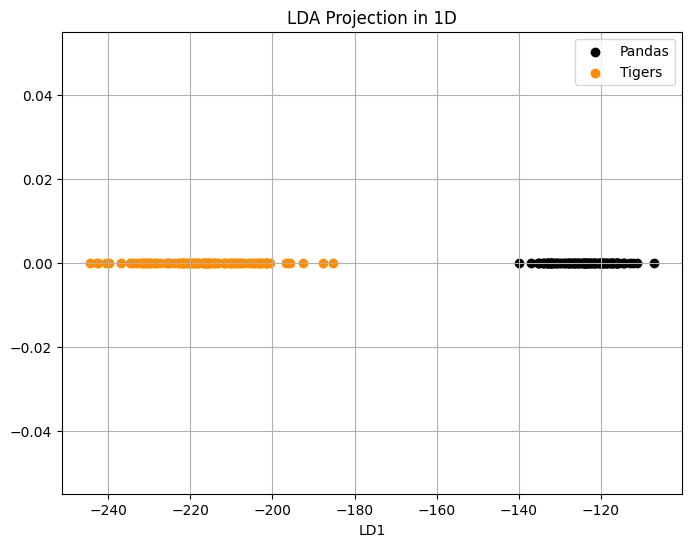

In [27]:
# Plot the results in 1D
plt.figure(figsize=(8, 6))
plt.scatter(projected_panda[:, 0], np.zeros_like(projected_panda[:, 0]), label='Pandas', color='Black')
plt.scatter(projected_tiger[:, 0], np.zeros_like(projected_tiger[:, 0]), label='Tigers', color='darkorange')
plt.xlabel('LD1')
plt.title('LDA Projection in 1D')
plt.legend()
plt.grid(True)
plt.show()



# 🔍Load Synthetic Data

In [3]:
df = pd.read_csv("./animals_2.csv")
panda_data = df[df["Class"] == "panda"][["Weight", "Size","Speed"]].to_numpy()
tiger_data = df[df["Class"] == "tiger"][["Weight", "Size","Speed"]].to_numpy()
cat_data = df[df["Class"] == "tiger"][["Weight", "Size","Speed"]].to_numpy()

# Performing LDA where P > 2

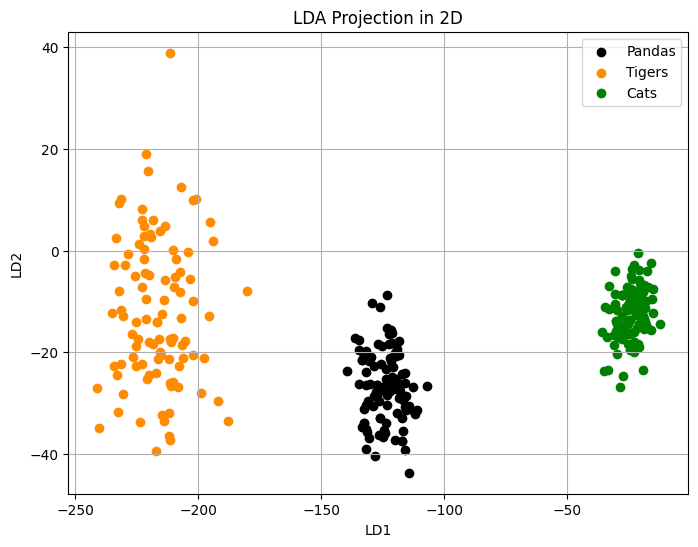

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./animals_2.csv")
panda_data = df[df["Class"] == "panda"][["Weight", "Size"]].to_numpy()
tiger_data = df[df["Class"] == "tiger"][["Weight", "Size"]].to_numpy()
cat_data = df[df["Class"] == "cat"][["Weight", "Size"]].to_numpy()

# Calculate mean vectors for each class
mean_panda = np.mean(panda_data, axis=0)
mean_tiger = np.mean(tiger_data, axis=0)
mean_cat = np.mean(cat_data, axis=0)

# Initialize S_W as a 2x2 matrix since you have 2 features
S_W = np.zeros((2, 2))

# Calculate scatter within matrix for each class
for x in panda_data:
    x_minus_mean = x - mean_panda
    S_W += np.outer(x_minus_mean, x_minus_mean)

for x in tiger_data:
    x_minus_mean = x - mean_tiger
    S_W += np.outer(x_minus_mean, x_minus_mean)

for x in cat_data:
    x_minus_mean = x - mean_cat
    S_W += np.outer(x_minus_mean, x_minus_mean)

# Calculate overall mean (m)
overall_mean = (mean_panda + mean_tiger + mean_cat) / 3

# Calculate between-class scatter matrix (S_B)
S_B = np.outer(mean_panda - overall_mean, mean_panda - overall_mean)
S_B += np.outer(mean_tiger - overall_mean, mean_tiger - overall_mean)
S_B += np.outer(mean_cat - overall_mean, mean_cat - overall_mean)

# Step 3: Calculate eigenvalues and eigenvectors for S_W^-1 * S_B
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Step 4: Keep the top k eigenvectors by ordering them by descending eigenvalues
k = 2  # Number of top eigenvectors to keep
top_eigenvectors = eigenvectors[:, np.argsort(eigenvalues)[::-1][:k]]

# Step 5: Use the top eigenvectors to project onto the new space
projected_panda = panda_data.dot(top_eigenvectors)
projected_tiger = tiger_data.dot(top_eigenvectors)
projected_cat = cat_data.dot(top_eigenvectors)

plt.figure(figsize=(8, 6))

# Scatterplot in 2D with flipped y-axis
plt.scatter(projected_panda[:, 0], -projected_panda[:, 1], label='Pandas', color='black')
plt.scatter(projected_tiger[:, 0], -projected_tiger[:, 1], label='Tigers', color='darkorange')
plt.scatter(projected_cat[:, 0], -projected_cat[:, 1], label='Cats', color='green')

plt.xlabel('LD1')
plt.ylabel('LD2') 
plt.title('LDA Projection in 2D')
plt.legend()
plt.grid(True)
plt.show()
